In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/README.md.txt
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (159).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (1106).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (825).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (1245).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (391).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (28).png
/kaggle/input/covid19-radiography-databa

/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (423).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (28).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (70).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1077).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (335).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (215).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (269).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1342).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral P

/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (514).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (8).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (610).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (342).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (102).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (1143).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (25).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (115).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (1108).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (1103).png
/kaggle/input/covid19-radiography-database/COVID-1

**Deep Learning for Screening COVID-19 usingChest X-Ray Images** 
https://www.researchgate.net/profile/Antonella_Santone/publication/342346453_Explainable_Deep_Learning_for_Pulmonary_Disease_and_Coronavirus_COVID-19_Detection_from_X-rays/links/5f679255a6fdcc008631c5c2/Explainable-Deep-Learning-for-Pulmonary-Disease-and-Coronavirus-COVID-19-Detection-from-X-rays.pdf

 (i)  detect  if110a chest X-ray is related to an healthy patient or to a patient with generic111pulmonary disease; (ii) to discriminate between generic pulmonary diseases112and COVID-19 and, once detected the COVID-19 disease, (iii) to highlight113the areas in the chest X-ray symptomatic of the COVID-19 disease.

In [51]:
import os

import numpy as np
import os
import cv2
from PIL import Image
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd


from PIL import Image
from matplotlib import pyplot as plt

from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model, load_model
from keras import backend as K

### Etape 0 preprocessing

In [52]:



WIDTH=256
HEIGHT=256
#using image_dataset_from_directory

x_dataset = []
y_dataset = []

for image in os.listdir('../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/'):
    image = cv2.imread('../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/'+image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (WIDTH,HEIGHT))
    #image = image/255.
    x_dataset.append(image)
    y_dataset.append(1)
    

for image in os.listdir('../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL'):
    image = cv2.imread('../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/'+image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (WIDTH,HEIGHT))
    #image = image/255.
    x_dataset.append(image)
    y_dataset.append(0)
    
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2, shuffle=True, random_state=2)
    
x_train = np.asarray(x_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_test = np.asarray(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [53]:
print(np.shape(x_train))
print(np.shape(x_test))

(2148, 256, 256, 3)
(538, 256, 256, 3)


In [54]:
# Creation of the second dataset for the second model to detect between covid / other diseases
x_dataset_2 = []
y_dataset_2 = []

for image in os.listdir('../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/'):
    image = cv2.imread('../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/'+image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (WIDTH,HEIGHT))
    #image = image/255.
    x_dataset_2.append(image)
    y_dataset_2.append(1)

    
for image in os.listdir('../input/covid-small-samples/covid/'):
    image = cv2.imread('../input/covid-small-samples/covid/'+image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (WIDTH,HEIGHT))
    #image = image/255.
    x_dataset_2.append(image)
    y_dataset_2.append(0)
    
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_dataset_2, y_dataset_2, test_size=0.2, shuffle=True, random_state=2)
    
x_train_2 = np.asarray(x_train_2)
x_train_2 = x_train_2.reshape(x_train_2.shape[0], x_train_2.shape[1], x_train_2.shape[2], 3)
x_test_2 = np.asarray(x_test_2)
x_test_2 = x_test_2.reshape(x_test_2.shape[0], x_test_2.shape[1], x_test_2.shape[2], 3)
y_train_2 = np.asarray(y_train_2)
y_test_2 = np.asarray(y_test_2)


print(np.shape(x_train_2))
print(np.shape(x_test_2))

(1232, 256, 256, 3)
(309, 256, 256, 3)


In [55]:
# Creation of the third dataset to test three classes together
x_dataset_3 = []
y_dataset_3 = []

for image in os.listdir('../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/'):
    image = cv2.imread('../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/'+image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (WIDTH,HEIGHT))
    #image = image/255.
    x_dataset_3.append(image)
    y_dataset_3.append(1)
    
for image in os.listdir('../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL'):
    image = cv2.imread('../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/'+image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (WIDTH,HEIGHT))
    #image = image/255.
    x_dataset_3.append(image)
    y_dataset_3.append(0)
    
for image in os.listdir('../input/covid-small-samples/covid/'):
    image = cv2.imread('../input/covid-small-samples/covid/'+image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (WIDTH,HEIGHT))
    #image = image/255.
    x_dataset_3.append(image)
    y_dataset_3.append(2)
    
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_dataset_3, y_dataset_3, test_size=0.2, shuffle=True, random_state=2)
    
x_train_3 = np.asarray(x_train_3)
x_train_3 = x_train_3.reshape(x_train_3.shape[0], x_train_3.shape[1], x_train_3.shape[2], 3)
x_test_3 = np.asarray(x_test_3)
x_test_3 = x_test_3.reshape(x_test_3.shape[0], x_test_3.shape[1], x_test_3.shape[2], 3)
y_train_3 = np.asarray(y_train_3)
y_test_3 = np.asarray(y_test_3)


print(np.shape(x_train_3))
print(np.shape(x_test_3))

(2305, 256, 256, 3)
(577, 256, 256, 3)


# Etape 1 : sain / malade

In [56]:
from keras.applications.vgg16 import VGG16

WIDTH=256
HEIGHT=256

base_model=VGG16(include_top=False, weights=None,input_shape=(WIDTH,HEIGHT,3), pooling='avg')

weights_path='../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model.load_weights(weights_path)

base_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [57]:
# creation of a personalized top to take care of the xrays
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, BatchNormalization
 
import tensorflow as tf
model1=Sequential()
model1.add(base_model)
model1.add(Flatten())
model1.add(Dense(units=64,activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(units=2, activation="softmax"))
model1.layers[0].trainable=False #VGG 16 freeze, that has already been trained

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 130       
Total params: 14,747,650
Trainable params: 32,962
Non-trainable params: 14,714,688
_________________________________________________________________


In [58]:

history = model1.fit(x_train, y_train, epochs=30, batch_size= 128, validation_data=(x_test, y_test), shuffle=True)



Epoch 1/30
17/17 [==============================] - 6s 358ms/step - loss: 1.8852 - accuracy: 0.6583 - val_loss: 0.5934 - val_accuracy: 0.8216
Epoch 2/30
17/17 [==============================] - 6s 345ms/step - loss: 0.5399 - accuracy: 0.8496 - val_loss: 0.2686 - val_accuracy: 0.9164
Epoch 3/30
17/17 [==============================] - 6s 346ms/step - loss: 0.3279 - accuracy: 0.8911 - val_loss: 0.1700 - val_accuracy: 0.9387
Epoch 4/30
17/17 [==============================] - 6s 345ms/step - loss: 0.2474 - accuracy: 0.9022 - val_loss: 0.1574 - val_accuracy: 0.9368
Epoch 5/30
17/17 [==============================] - 6s 344ms/step - loss: 0.2144 - accuracy: 0.9176 - val_loss: 0.1519 - val_accuracy: 0.9424
Epoch 6/30
17/17 [==============================] - 6s 343ms/step - loss: 0.1844 - accuracy: 0.9269 - val_loss: 0.1395 - val_accuracy: 0.9442
Epoch 7/30
17/17 [==============================] - 6s 349ms/step - loss: 0.1739 - accuracy: 0.9325 - val_loss: 0.1407 - val_accuracy: 0.9405
Epoch 

In [59]:
model2=Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(units=64,activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(units=2, activation="softmax"))
model2.layers[0].trainable=False #VGG 16 freeze, that has already been trained


model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 130       
Total params: 14,747,650
Trainable params: 32,962
Non-trainable params: 14,714,688
_________________________________________________________________


In [60]:

history_2 = model2.fit(x_train_2, y_train_2, epochs=30, batch_size= 128, validation_data=(x_test_2, y_test_2), shuffle=True)

Epoch 1/30
10/10 [==============================] - 3s 346ms/step - loss: 0.5580 - accuracy: 0.8498 - val_loss: 0.0762 - val_accuracy: 0.9806
Epoch 2/30
10/10 [==============================] - 3s 325ms/step - loss: 0.1540 - accuracy: 0.9456 - val_loss: 0.0194 - val_accuracy: 0.9935
Epoch 3/30
10/10 [==============================] - 3s 325ms/step - loss: 0.0687 - accuracy: 0.9773 - val_loss: 0.0143 - val_accuracy: 0.9935
Epoch 4/30
10/10 [==============================] - 3s 324ms/step - loss: 0.0455 - accuracy: 0.9821 - val_loss: 0.0170 - val_accuracy: 0.9935
Epoch 5/30
10/10 [==============================] - 3s 324ms/step - loss: 0.0331 - accuracy: 0.9870 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - 3s 325ms/step - loss: 0.0327 - accuracy: 0.9870 - val_loss: 0.0081 - val_accuracy: 0.9968
Epoch 7/30
10/10 [==============================] - 3s 323ms/step - loss: 0.0180 - accuracy: 0.9951 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 

In [61]:
model3=Sequential()
model3.add(base_model)
model3.add(Flatten())
model3.add(Dense(units=64,activation="relu"))
model3.add(Dropout(0.3))
model3.add(Dense(units=3, activation="softmax"))
model3.layers[0].trainable=False #VGG 16 freeze, that has already been trained


model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 195       
Total params: 14,747,715
Trainable params: 33,027
Non-trainable params: 14,714,688
_________________________________________________________________


In [62]:

history_3 = model3.fit(x_train_3, y_train_3, epochs=30, batch_size= 128, validation_data=(x_test_3, y_test_3), shuffle=True)

Epoch 1/30
19/19 [==============================] - 7s 362ms/step - loss: 1.5812 - accuracy: 0.6946 - val_loss: 0.3077 - val_accuracy: 0.8856
Epoch 2/30
19/19 [==============================] - 6s 333ms/step - loss: 0.4672 - accuracy: 0.8447 - val_loss: 0.2721 - val_accuracy: 0.9029
Epoch 3/30
19/19 [==============================] - 6s 331ms/step - loss: 0.2898 - accuracy: 0.8959 - val_loss: 0.2036 - val_accuracy: 0.9341
Epoch 4/30
19/19 [==============================] - 6s 332ms/step - loss: 0.2621 - accuracy: 0.9041 - val_loss: 0.1934 - val_accuracy: 0.9359
Epoch 5/30
19/19 [==============================] - 6s 333ms/step - loss: 0.2249 - accuracy: 0.9102 - val_loss: 0.1949 - val_accuracy: 0.9289
Epoch 6/30
19/19 [==============================] - 6s 332ms/step - loss: 0.2032 - accuracy: 0.9241 - val_loss: 0.1820 - val_accuracy: 0.9307
Epoch 7/30
19/19 [==============================] - 6s 332ms/step - loss: 0.1933 - accuracy: 0.9275 - val_loss: 0.1790 - val_accuracy: 0.9307
Epoch 

# Plot

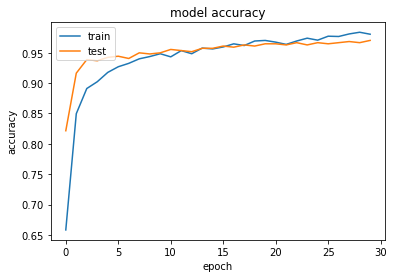

In [63]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



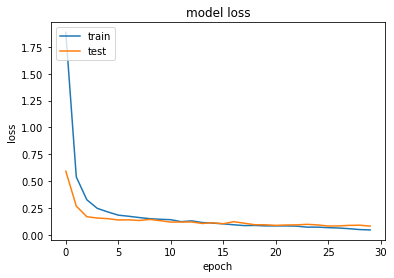

In [64]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



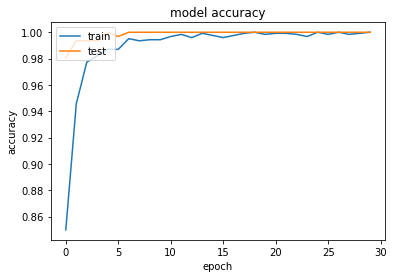

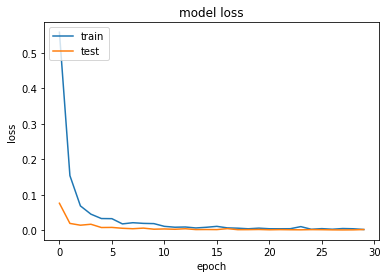

In [65]:

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


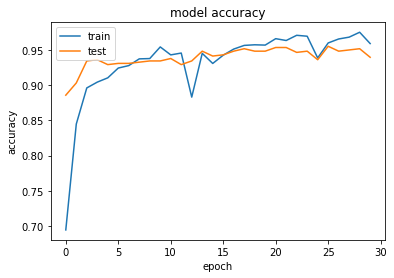

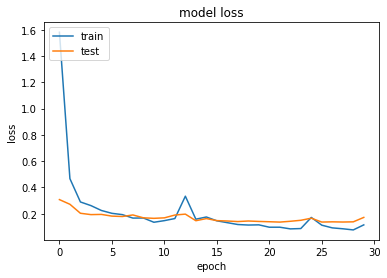

In [66]:

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

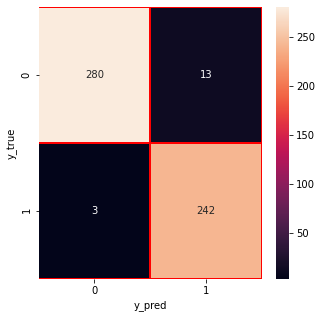

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


ynew = model1.predict_classes(x_test)
cm=confusion_matrix(ynew,y_test)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

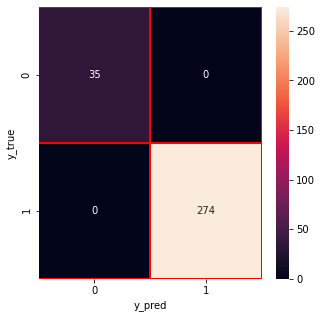

In [89]:
ynew2 = model2.predict_classes(x_test_2)
cm=confusion_matrix(ynew2,y_test_2)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

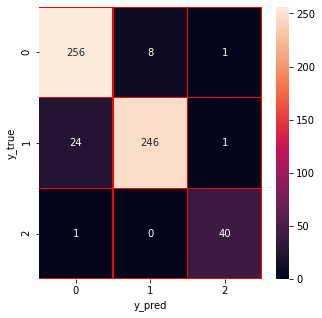

In [87]:
ynew3 = model3.predict_classes(x_test_3)
cm=confusion_matrix(ynew3,y_test_3)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [92]:
from sklearn.metrics import f1_score
score = f1_score(y_test, ynew, average='weighted')
print('F-Measure: %.3f' % score)
score = f1_score(y_test_2, ynew2, average='weighted')
print('F-Measure: %.3f' % score)
score = f1_score(y_test_3, ynew3, average='weighted')
print('F-Measure: %.3f' % score)

F-Measure: 0.970


ValueError: Found input variables with inconsistent numbers of samples: [577, 309]